### Polynomial Regression
- So those linear regression results were *alright*, but I'd really like to see some better results on nonlinear functions. And as a bonus, it would be great if performance on linear functions was still good.
- The next step for this is polynomial regression! Recall that the formula for linear regression in statistics is: $$Y=\beta_0+\beta_1X_1+\epsilon$$ To do polynomial regression, all we need to do is expand that to: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_nX_n+\epsilon$$
- That assumes multiple dimensions. We just have a single independent variable, so the equation for this scenario is really just $$Y=\beta_0+\beta_1X+\beta_2X^2+...+\beta_nX^n$$
- This is all fine and good, but the difficult part is needing to create a new algorithm for each degree of polynomial. 
    - Well, if you've taken a Linear Algebra course, you know that you can create a linear transformation that will take polynomial vectors and linearize them. 
    - This allows for us to create a polynomial regression model for any degree polynomial, just by using a linear regression algorithm.
    - Math is amazing!

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import numpy as np

import datasets.linear
import datasets.poly
import datasets.trig

### Imports
- The imports are very simple for this.
    1. `sklearn.linear_model` is just the algorithm that is being used from scikit-learn
    2. `sklearn.preprocessing` is the library that gives us access to the polynomial transformation
    3. `matplotlib.pyplot` is the plotting library that will be used to show results
    4. `numpy` is used for some computations
    5. `datasets.*` is the small collection of programs I made to create random datasets

In [33]:
linear_data = datasets.linear.gen_data(0, 100)
linearvar_data = datasets.linear.gen_data(0, 100, 0.5)

poly_data = datasets.poly.gen_data(0, 100)
polyvar_data = datasets.poly.gen_data(0, 100, 0.5)

trig_data = datasets.trig.gen_data(0, 100)
trigvar_data = datasets.trig.gen_data(0, 100, 0.5)

featureset = np.array([np.array([i]) for i in np.arange(0, 200, 3.67)])
predictions = np.empty(0)

1X + 5
-5X + -1
-5X^4 + 1X^3 + 5X^2 + 5X + 2
1X^4 + 3X^3 + 4X^2 + 3X + 2
-2sin(X) + 4cos(X)
-4sin(X) + -4cos(X)


### Datasets
- This is just the same setup every time.

In [34]:
def train_and_plot(model: LinearRegression, dataset: dict, featureset: np.array, degree: int) -> np.ndarray:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(dataset['X'])
    poly_featureset = poly.fit_transform(featureset)

    model.fit(X_poly, dataset['Y'])
    
    predictions = model.predict(poly_featureset)
    
    ax = plt.gca()

    xlim = featureset[-1]
    ax.set_xlim(-xlim, xlim)
    
    ylim1 = abs(max(predictions))
    ylim2 = abs(min(predictions))
    if (ylim1 > ylim2):
        ax.set_ylim(-ylim1, ylim1)
    else:
        ax.set_ylim(-ylim2, ylim2)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.scatter(dataset['X'], dataset['Y'], c='blue')
    ax.scatter(featureset, predictions, c='red', s=10)
    ax.legend(['Training Data', 'Predicted Data'])
    
    plt.show()
    
    return predictions


### Training
- This is also the same as the linear regression training
- The only difference is that we need to use the transformation on the $X$ dataset and the features and select the degree of the polynomial that the transformation should use
    - A degree of 4 will be selected for now, as taht is the maximum degree of the polynomial dataset.
    - Higher degrees will be tested as well.

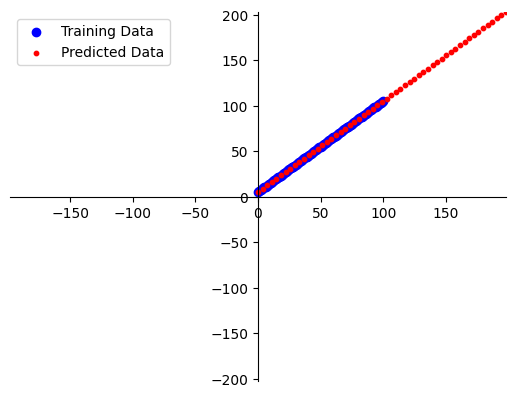

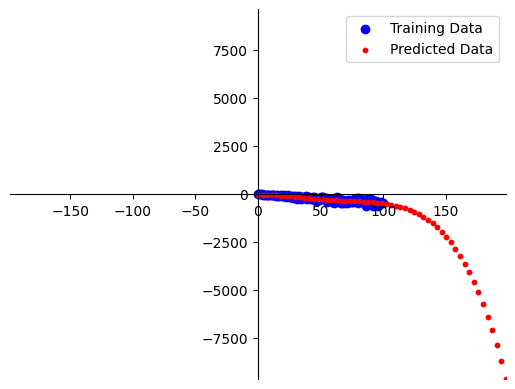

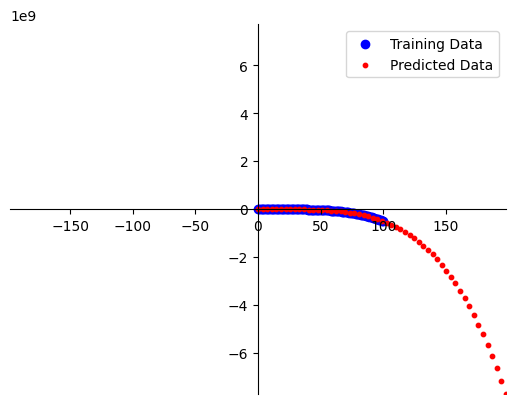

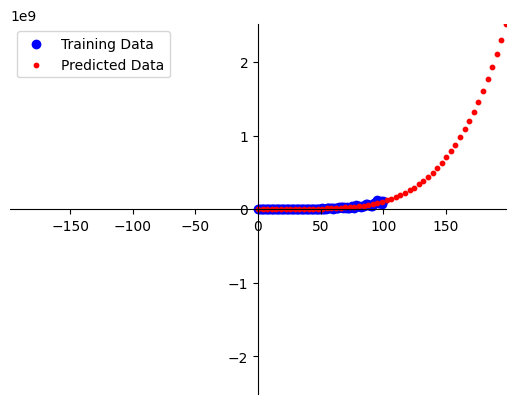

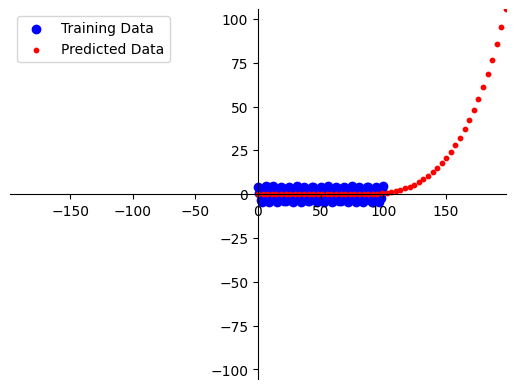

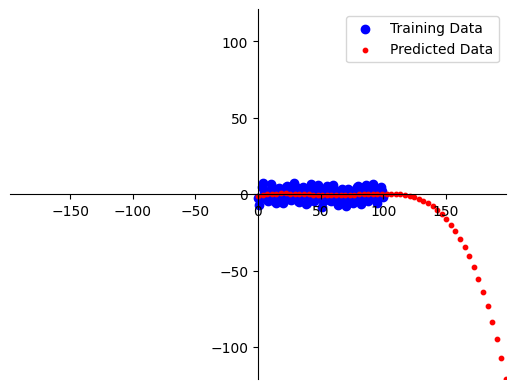

array([-1.22301610e+00, -5.73498946e-01, -1.03707060e-01,  2.13171801e-01,
        4.02170677e-01,  4.86543400e-01,  4.87764601e-01,  4.25529708e-01,
        3.17754941e-01,  1.80577322e-01,  2.83546641e-02, -1.26334420e-01,
       -2.72690523e-01, -4.01693440e-01, -5.06102172e-01, -5.80454920e-01,
       -6.21069094e-01, -6.26041302e-01, -5.95247361e-01, -5.30342287e-01,
       -4.34760304e-01, -3.13714836e-01, -1.74198513e-01, -2.49831695e-02,
        1.23380159e-01,  2.58561232e-01,  3.66450604e-01,  4.31159627e-01,
        4.35020450e-01,  3.58586017e-01,  1.80630069e-01, -1.21852858e-01,
       -5.73647430e-01, -1.20131752e+00, -2.03320620e+00, -3.09943574e+00,
       -4.43190764e+00, -6.06430257e+00, -8.03208042e+00, -1.03724803e+01,
       -1.31245205e+01, -1.63289985e+01, -2.00284910e+01, -2.42673539e+01,
       -2.90917224e+01, -3.45495108e+01, -4.06904125e+01, -4.75659003e+01,
       -5.52292261e+01, -6.37354211e+01, -7.31412956e+01, -8.35054390e+01,
       -9.48882203e+01, -

In [35]:
train_and_plot(LinearRegression(), linear_data, featureset, 4)
train_and_plot(LinearRegression(), linearvar_data, featureset, 4)

train_and_plot(LinearRegression(), poly_data, featureset, 4)
train_and_plot(LinearRegression(), polyvar_data, featureset, 4)

train_and_plot(LinearRegression(), trig_data, featureset, 4)
train_and_plot(LinearRegression(), trigvar_data, featureset, 4)

### Degree $n=4$ Results
- These results look very promising!
- Fits on the polynomials look great, as expected.
- Fits on the linear functions look good as well, although there appears to be some overfitting when variance is added.
- Trigonometric functions still have a long way to go, but we are starting to see some sine-like behavior in intervals of interpolation.
- The big question is whether or not we can improve thigs by increasing the degree...
    - I think this will have a slight effect on the polynomial datasets, overfitting with the inclusion of variance
    - I think this will have a large effect on linear datasets, even without variance
    - Finally, I think that this could pottentially get good results for trigonometric datasets. Recall from calculus that $$\sin(x)=\sum_{n=0}^\infty (-1)\frac{x^{2n+1}}{(2n+1)!}=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+...$$ Which means that $\sin(x)$ (and $\cos(x)$, of course) are polynomials with degree $n=\infty$. From this, it stands to reason that choosing a high degree might yield good results.

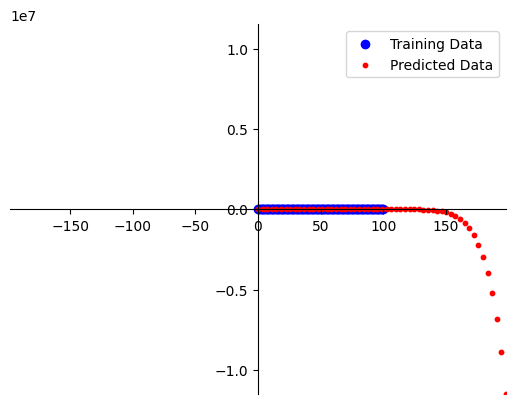

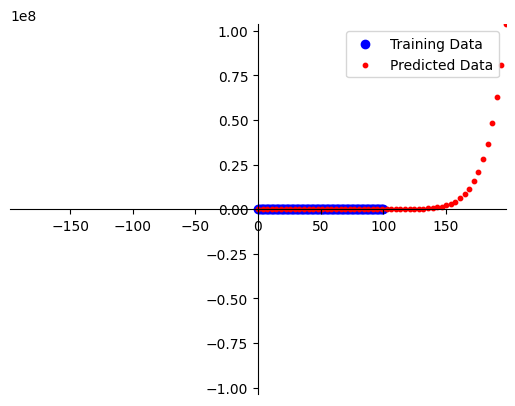

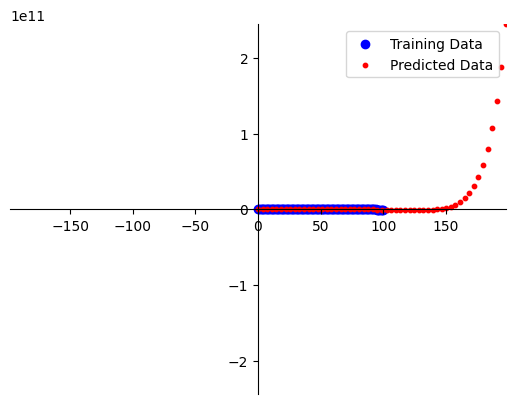

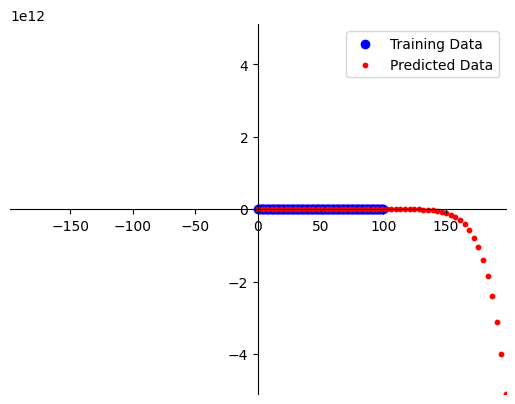

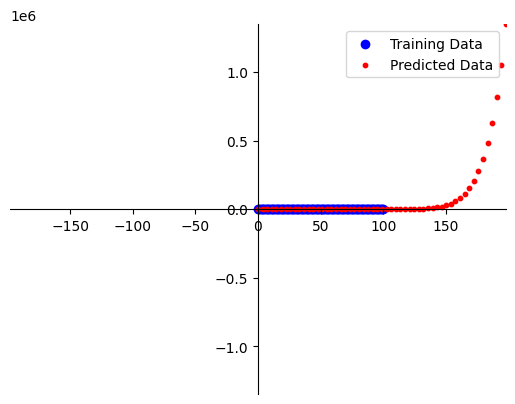

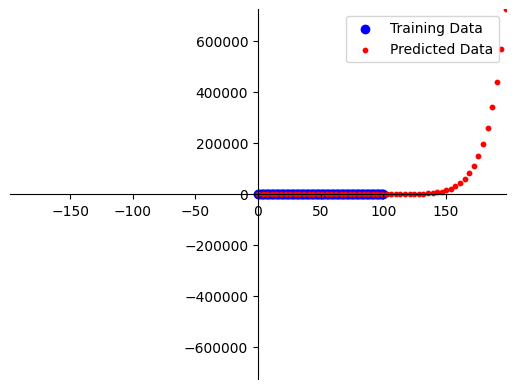

array([ 5.73159043e-02,  5.72749839e-02,  5.64060699e-02,  5.26340406e-02,
        4.44662093e-02,  3.30969448e-02,  2.27019698e-02,  1.86313459e-02,
        2.43094847e-02,  3.81439405e-02,  5.17531688e-02,  5.04678409e-02,
        1.64615991e-02, -6.58537039e-02, -2.03255308e-01, -3.87648747e-01,
       -5.92569970e-01, -7.74301444e-01, -8.79170823e-01, -8.57514736e-01,
       -6.82979841e-01, -3.73177468e-01, -4.08604652e-03,  2.94113876e-01,
        3.78004814e-01,  1.94177244e-01, -2.10694409e-02,  5.98874288e-01,
        4.08883355e+00,  1.44572355e+01,  3.88448600e+01,  8.91405992e+01,
        1.84177808e+02,  3.52657061e+02,  6.36965781e+02,  1.09809240e+03,
        1.82186255e+03,  2.92675744e+03,  4.57361007e+03,  6.97751347e+03,
        1.04223170e+04,  1.52781313e+04,  2.20223119e+04,  3.12644409e+04,
        4.37758856e+04,  6.05245680e+04,  8.27156443e+04,  1.11838862e+05,
        1.49723428e+05,  1.98601308e+05,  2.61179937e+05,  3.40725430e+05,
        4.41157453e+05,  

In [36]:
train_and_plot(LinearRegression(), linear_data, featureset, 10)
train_and_plot(LinearRegression(), linearvar_data, featureset, 10)

train_and_plot(LinearRegression(), poly_data, featureset, 10)
train_and_plot(LinearRegression(), polyvar_data, featureset, 10)

train_and_plot(LinearRegression(), trig_data, featureset, 10)
train_and_plot(LinearRegression(), trigvar_data, featureset, 10)

### Degree $n=10$ Results
- As expected, polynomial results are still very good, albeit with some slight overfitting with variance.
- Linear results are very much overfit, as expected.
- We can see some improvements with the trigonometric data sets, but not quite as much as I had expected or hoped for. The dataset without variance actually looks much worse.

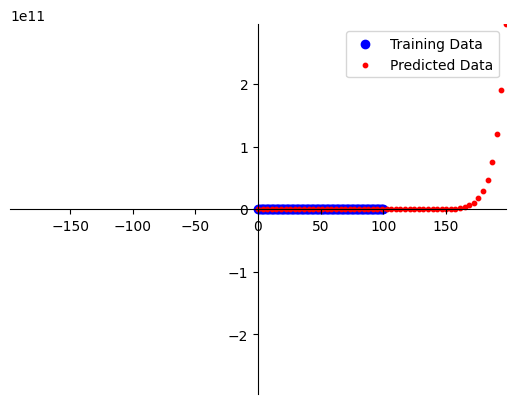

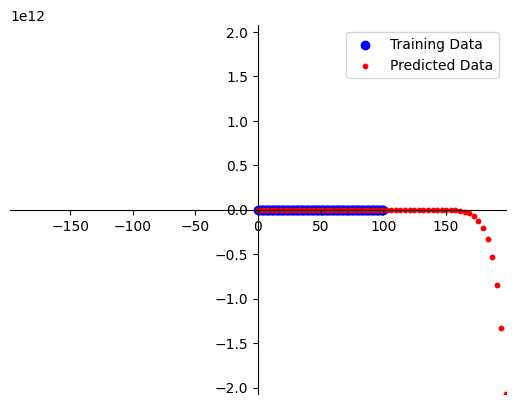

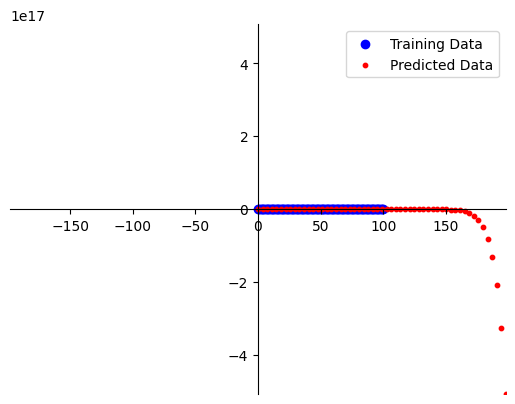

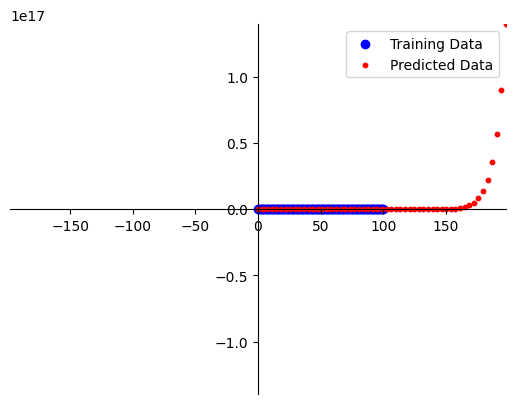

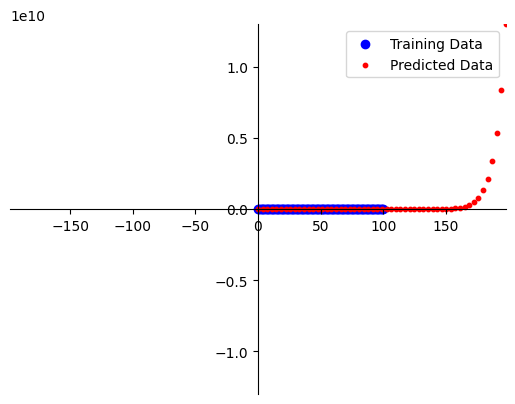

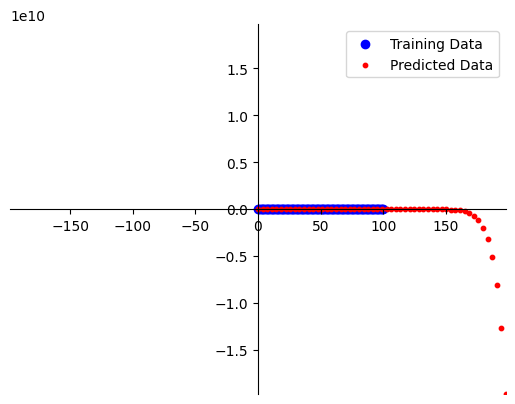

array([ 4.63163876e-02,  4.63163876e-02,  4.63163876e-02,  4.63163875e-02,
        4.63163834e-02,  4.63162663e-02,  4.63145703e-02,  4.62992386e-02,
        4.62015463e-02,  4.57274345e-02,  4.38819939e-02,  3.79140166e-02,
        2.14908137e-02, -1.75628323e-02, -9.84468435e-02, -2.44338075e-01,
       -4.70977956e-01, -7.64695998e-01, -1.05528255e+00, -1.20324106e+00,
       -1.03583423e+00, -4.64093993e-01,  3.37726649e-01,  8.36276109e-01,
        4.40933887e-01, -5.32141096e-01, -5.81147083e-02,  1.23314196e+00,
       -2.62339289e+01, -2.34317704e+02, -1.16459939e+03, -4.42293897e+03,
       -1.42364974e+04, -4.08143526e+04, -1.07222615e+05, -2.62839962e+05,
       -6.08720186e+05, -1.34386815e+06, -2.84729497e+06, -5.81986559e+06,
       -1.15239780e+07, -2.21802716e+07, -4.16120014e+07, -7.62737949e+07,
       -1.36868173e+08, -2.40848542e+08, -4.16242145e+08, -7.07415070e+08,
       -1.18366281e+09, -1.95186883e+09, -3.17496219e+09, -5.09856544e+09,
       -8.08910805e+09, -

In [37]:
train_and_plot(LinearRegression(), linear_data, featureset, 20)
train_and_plot(LinearRegression(), linearvar_data, featureset, 20)

train_and_plot(LinearRegression(), poly_data, featureset, 20)
train_and_plot(LinearRegression(), polyvar_data, featureset, 20)

train_and_plot(LinearRegression(), trig_data, featureset, 20)
train_and_plot(LinearRegression(), trigvar_data, featureset, 20)

### Degree $n=20$ Results
- It looks as if this is a failed experiment. All results experience overfitting, and the trigonometric datasets are markedly worse.
- Still an interesting idea!